In [43]:
import numpy as np
import scipy.signal as signal
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

def calc_strouhal(t, cl, L, V, xlim=None):
    N       = len(t)
    dt      = t[2] - t[1]
    
    cl_prime = cl - cl.mean()
    
    # # Estimating PSD via welch method 
    # freq, Cd_amp = signal.welch(Cd, 1./dt, nperseg=nmax)
    freq, cl_amp = signal.welch(cl_prime, 1./dt, nperseg=N)
    plt.figure(figsize=(16, 4))
    plt.plot(freq, cl_amp)         # Figure 2.10
    if xlim is not None:
        plt.xlim(xlim)
    plt.show() 

    # # Strouhal Number
    # Find the index corresponding to max amplitude
    cl_max_fft_idx = np.argmax(abs(cl_amp))  
    freq_shed      = freq[cl_max_fft_idx ]
    st             = freq_shed * L / V

    print(f"Vortex shedding freq: {freq_shed} [Hz]")
    print(f"Strouhal Number: {st}")
    
    
def plot_coefficients(t, cl, cd,
                      cl_xlim=None, cl_ylim=None,
                      cd_xlim=None, cd_ylim=None,
                      oscillation_cl_start_index=1000, oscillation_cd_start_index=1000):
    
    plt.figure(figsize=(16, 4))
    plt.plot(t, cl)
    if cl_xlim is not None:
        plt.xlim(cl_xlim)
    if cl_ylim is not None:
        plt.ylim(cl_ylim)
    plt.xlabel('time, $t$ [s]')
    plt.ylabel('Lift Coefficient, $C_L$')
    plt.grid(b=True, which='major')
    plt.show()

    plt.figure(figsize=(16, 4))
    plt.plot(t, cd)
    if cd_xlim is not None:
        plt.xlim(cd_xlim)
    if cd_ylim is not None:
        plt.ylim(cd_ylim)
    plt.xlabel('time, $t$ [s]')
    plt.ylabel('Drag Coefficient, $C_D$')
    plt.grid(b=True, which='major')
    plt.show()
    
    oscillation_cl = cl[oscillation_cl_start_index:]
    oscillation_cl_mean = oscillation_cl.mean()
    oscillation_cl_min_max = np.max([np.abs(oscillation_cl.max()-oscillation_cl_mean),np.abs(oscillation_cl.min()-oscillation_cl_mean)])

    oscillation_cd = cd[oscillation_cd_start_index:]
    oscillation_cd_mean = oscillation_cd.mean()
    oscillation_cd_min_max = np.max([np.abs(oscillation_cd.max()-oscillation_cd_mean),np.abs(oscillation_cd.min()-oscillation_cd_mean)])
    
    ocsillation_cl_rms = np.sqrt(np.mean(np.square(oscillation_cl-oscillation_cl.mean())))
    ocsillation_cd_rms = np.sqrt(np.mean(np.square(oscillation_cd-oscillation_cd.mean())))
    
    print(f'Lift coefficient of {oscillation_cl_mean} +- {oscillation_cl_min_max}')
    print(f'Drag coefficient of {oscillation_cd_mean} +- {oscillation_cd_min_max}')
    print(f'Lift coefficient RMS of {ocsillation_cl_rms}')
    print(f'Drag coefficient RMS of {ocsillation_cd_rms}')

## SimpleFoam solver mesh study - Transient


In [56]:
coarse_filename = '/fsx/example-case/mesh_study_re100_transient/transient_laminar_re100_coarse/postProcessing/forceCoeffs/0/coefficient.dat'
medium_filename = '/fsx/example-case/mesh_study_re100_transient/transient_laminar_re100_medium/postProcessing/forceCoeffs/0/coefficient.dat'
fine_filename = '/fsx/example-case/mesh_study_re100_transient/transient_laminar_re100_fine/postProcessing/forceCoeffs/0/coefficient.dat'

coarse_data = np.loadtxt(coarse_filename, skiprows=0)
medium_data = np.loadtxt(medium_filename, skiprows=0)
fine_data = np.loadtxt(fine_filename, skiprows=0)

print(coarse_data.shape)
print(medium_data.shape)
print(fine_data.shape)

spacer = 40

(20000, 13)
(20000, 13)
(20000, 13)


### Coarse mesh

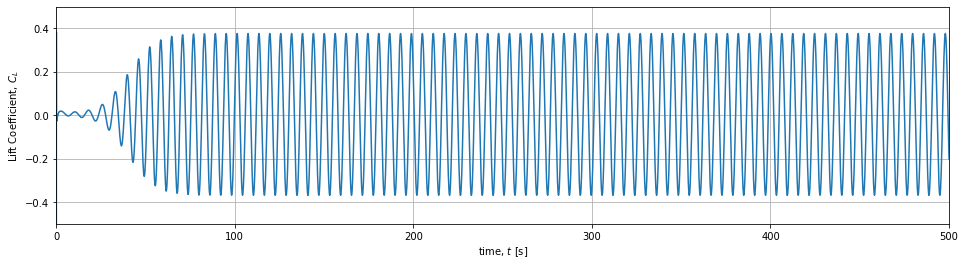

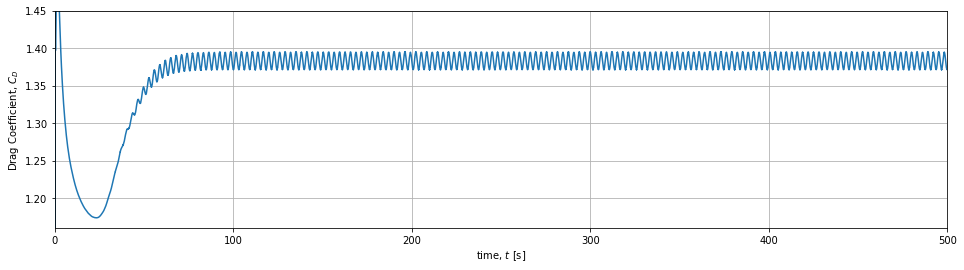

Lift coefficient of 0.005565586174785581 +- 0.3735428051747856
Drag coefficient of 1.3828952961724998 +- 0.012030703827500266


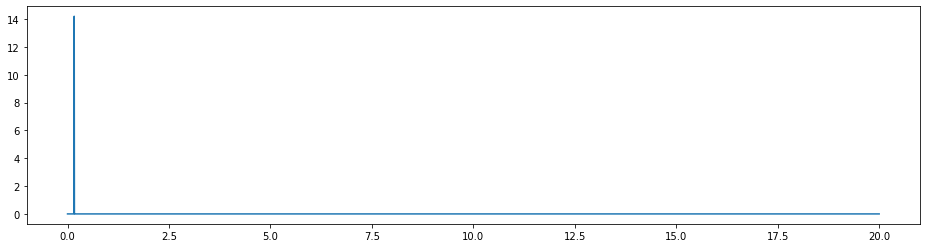

Vortex shedding freq: 0.16499999999996248 [Hz]
Strouhal Number: 0.16499999999996248


In [57]:
coarse_t = coarse_data[:,0]
coarse_cd = coarse_data[:,1]
coarse_cl = coarse_data[:,3]

L = 1
V = 1

plot_coefficients(coarse_t, coarse_cl, coarse_cd,
                 [0, 500], [-0.5, 0.5],
                 [0, 500], [1.16, 1.45],
                 spacer*100, spacer*100)
calc_strouhal(coarse_t[spacer*100:], coarse_cl[spacer*100:], L, V)

### Medium mesh

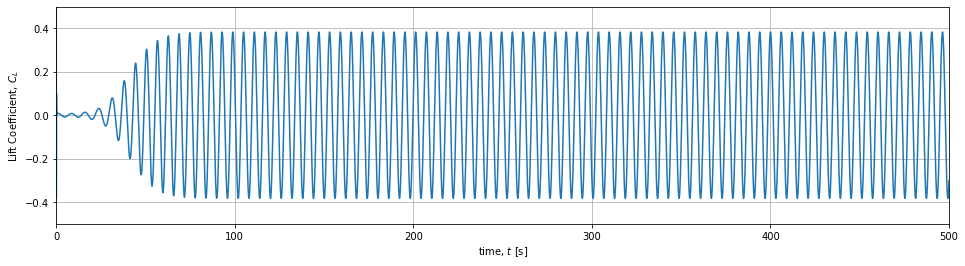

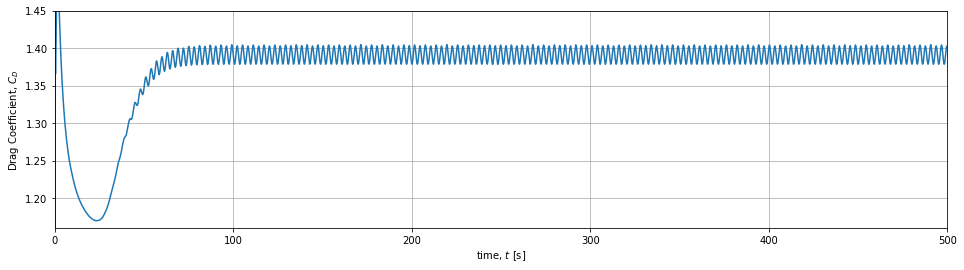

Lift coefficient of -0.0011418583395353312 +- 0.3839422803395353
Drag coefficient of 1.3908819433 +- 0.013091426700000186


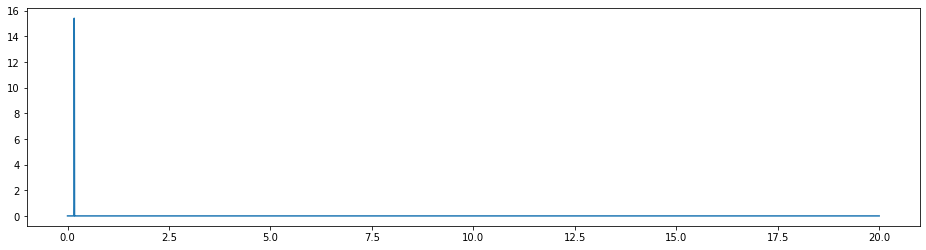

Vortex shedding freq: 0.16499999999996248 [Hz]
Strouhal Number: 0.16499999999996248


In [80]:
medium_t = medium_data[:,0]
medium_cd = medium_data[:,1]
medium_cl = medium_data[:,3]

L = 1
V = 1

plot_coefficients(medium_t, medium_cl, medium_cd,
                 [0, 500], [-0.5, 0.5],
                 [0, 500], [1.16, 1.45],
                 spacer*100, spacer*100)
calc_strouhal(medium_t[spacer*100:], medium_cl[spacer*100:], L, V)

### Fine mesh

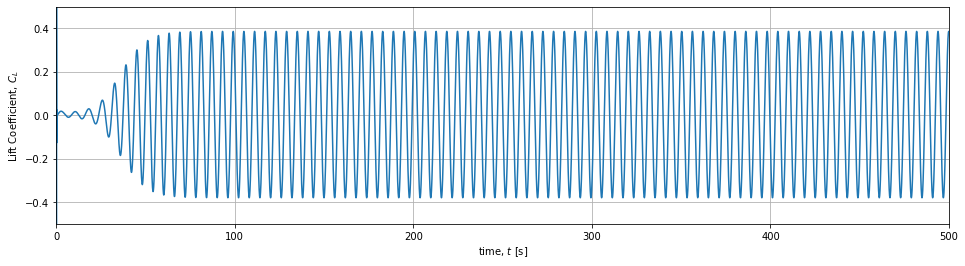

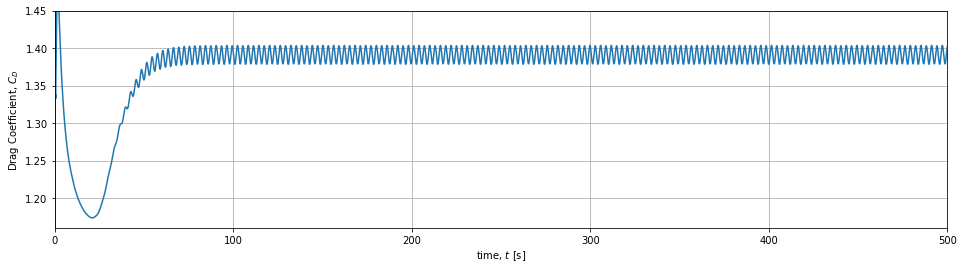

Lift coefficient of 0.002682801540786435 +- 0.3831160074592136
Drag coefficient of 1.3909346271925 +- 0.012634067192500043


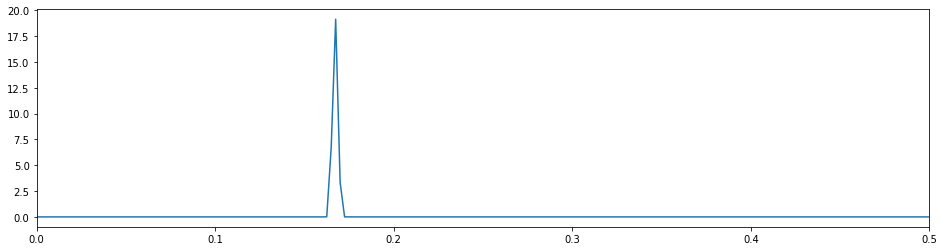

Vortex shedding freq: 0.1674999999999619 [Hz]
Strouhal Number: 0.1674999999999619


In [81]:
fine_t = fine_data[:,0]
fine_cd = fine_data[:,1]
fine_cl = fine_data[:,3]

L = 1
V = 1 

plot_coefficients(fine_t, fine_cl, fine_cd,
                 [0, 500], [-0.5, 0.5],
                 [0, 500], [1.16, 1.45],
                 spacer*100, spacer*100)
calc_strouhal(fine_t[spacer*100:], fine_cl[spacer*100:], L, V, [0,0.5])

### Fine mesh

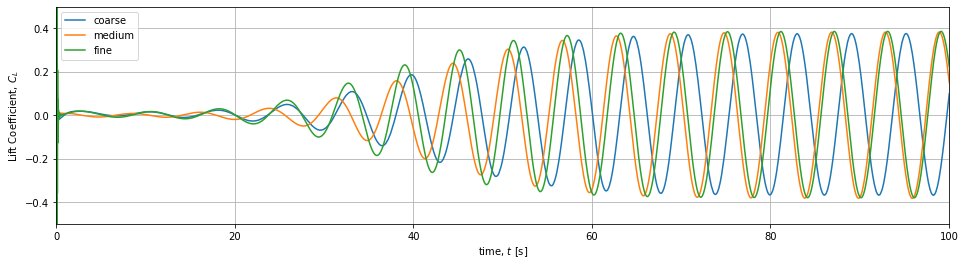

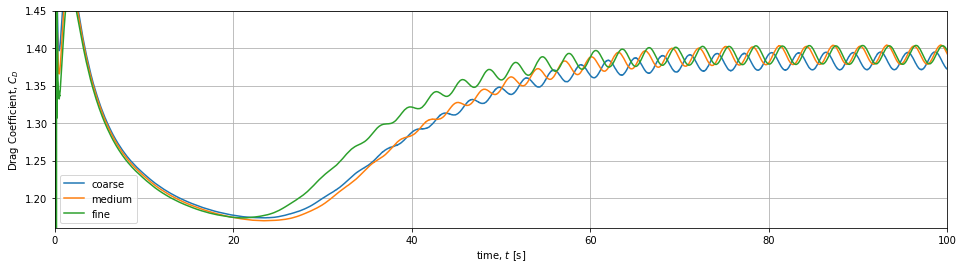

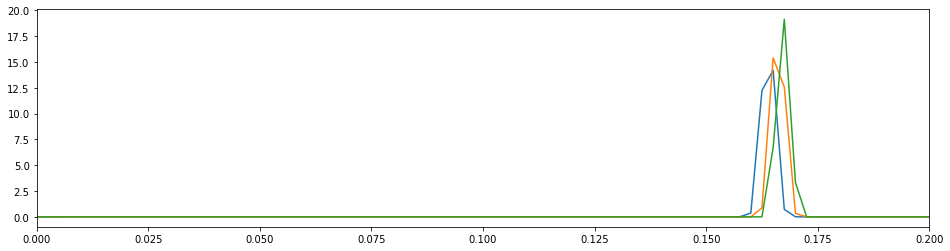

In [79]:
cl_xlim = [0, 100]
cl_ylim = [-0.5, 0.5]

cd_xlim = [0, 100]
cd_ylim = [1.16, 1.45]

st_xlim = [0, 0.2]

plt.figure(figsize=(16, 4))
plt.plot(coarse_t, coarse_cl, label='coarse')
plt.plot(medium_t, medium_cl, label='medium')
plt.plot(fine_t, fine_cl, label='fine')
plt.xlim(cl_xlim)
plt.ylim(cl_ylim)
plt.xlabel('time, $t$ [s]')
plt.ylabel('Lift Coefficient, $C_L$')
plt.grid(b=True, which='major')
plt.legend()
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(coarse_t, coarse_cd, label='coarse')
plt.plot(medium_t, medium_cd, label='medium')
plt.plot(fine_t, fine_cd, label='fine')
plt.xlim(cd_xlim)
plt.ylim(cd_ylim)
plt.xlabel('time, $t$ [s]')
plt.ylabel('Drag Coefficient, $C_D$')
plt.grid(b=True, which='major')
plt.legend()
plt.show()


N = len(coarse_t[spacer*100:])
dt = coarse_t[2] - coarse_t[1]

plt.figure(figsize=(16, 4))
cl_prime = coarse_cl[spacer*100:] - coarse_cl[spacer*100:].mean()
freq, cl_amp = signal.welch(cl_prime, 1./dt, nperseg=N)
plt.plot(freq, cl_amp, label='coarse')
cl_prime = medium_cl[spacer*100:] - medium_cl[spacer*100:].mean()
freq, cl_amp = signal.welch(cl_prime, 1./dt, nperseg=N)
plt.plot(freq, cl_amp, label='medium')
cl_prime = fine_cl[spacer*100:] - fine_cl[spacer*100:].mean()
freq, cl_amp = signal.welch(cl_prime, 1./dt, nperseg=N)
plt.plot(freq, cl_amp, label='fine')
plt.xlim(st_xlim)
plt.show() 

In [19]:
! ls /fsx/example-case/geometry_study_re100_transient

Allclean_cases.sh	  diamond_ar_0p625  generate_cases.sh  triangle_ar_0p83
Allrun_cases.sh		  diamond_ar_0p66   post_process_2.py  triangle_ar_1p0
Allrun_parallel_cases.sh  diamond_ar_0p71   post_process.pvsm  triangle_ar_1p25
base			  diamond_ar_0p83   remove_cases.sh    triangle_ar_1p5
cylinder		  diamond_ar_1p0    square	       triangle_ar_1p66
cylinder_half		  diamond_ar_1p25   triangle_ar_0p5    triangle_ar_2p0
cylinder_half_flipped	  diamond_ar_1p5    triangle_ar_0p56   triangle_ar_2p5
dataset_6_40		  diamond_ar_1p66   triangle_ar_0p625
diamond_ar_0p5		  diamond_ar_2p0    triangle_ar_0p66
diamond_ar_0p56		  diamond_ar_2p5    triangle_ar_0p71


In [46]:
square_filename = '/fsx/example-case/geometry_study_re100_transient/square_1/postProcessing/forceCoeffs/0/coefficient.dat'
triangle_filename = '/fsx/example-case/geometry_study_re100_transient/triangle_ar_1p0/postProcessing/forceCoeffs/0/coefficient.dat'
diamond_filename = '/fsx/example-case/geometry_study_re100_transient/diamond_ar_1p0_/postProcessing/forceCoeffs/0/coefficient.dat'

square_data = np.loadtxt(square_filename, skiprows=0)
triangle_data = np.loadtxt(triangle_filename, skiprows=0)
diamond_data = np.loadtxt(diamond_filename, skiprows=0)

print(square_data.shape)
print(triangle_data.shape)
print(diamond_data.shape)

spacer = 40

(20000, 13)
(5000, 13)
(20000, 13)


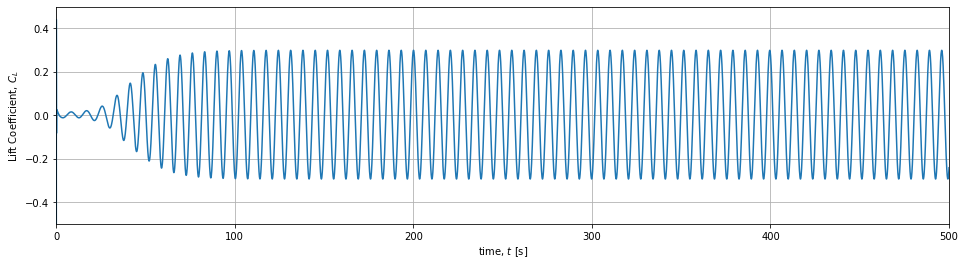

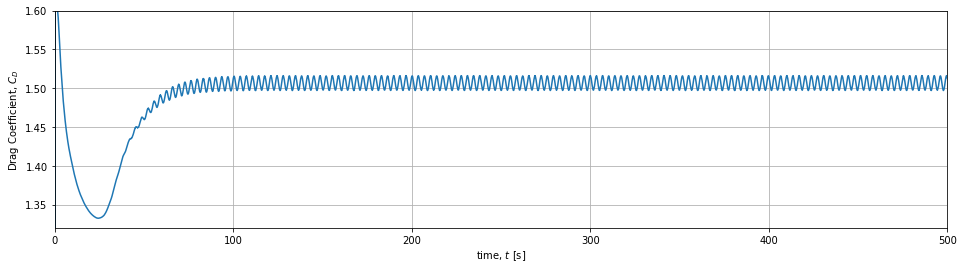

Lift coefficient of 0.002376008780424418 +- 0.29647933621957556
Drag coefficient of 1.5066358931508332 +- 0.009556216849166743
Lift coefficient RMS of 0.20939495991127863
Drag coefficient RMS of 0.0065625456735681174


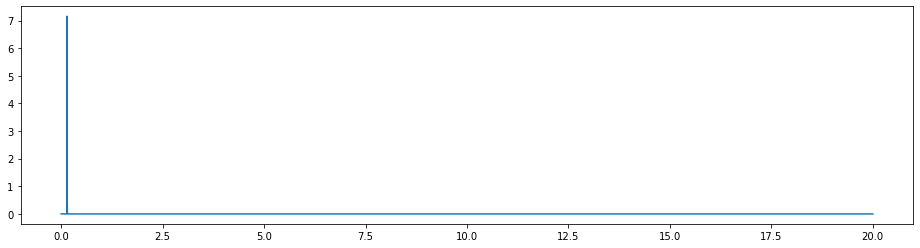

Vortex shedding freq: 0.14666666666680006 [Hz]
Strouhal Number: 0.14666666666680006


In [47]:
square_t = square_data[:,0]
square_cd = square_data[:,1]
square_cl = square_data[:,3]

L = 1
V = 1

plot_coefficients(square_t, square_cl, square_cd,
                 [0, 500], [-0.5, 0.5],
                 [0, 500], [1.32, 1.6],
                 spacer*200, spacer*200)
calc_strouhal(square_t[spacer*200:], square_cl[spacer*200:], L, V)

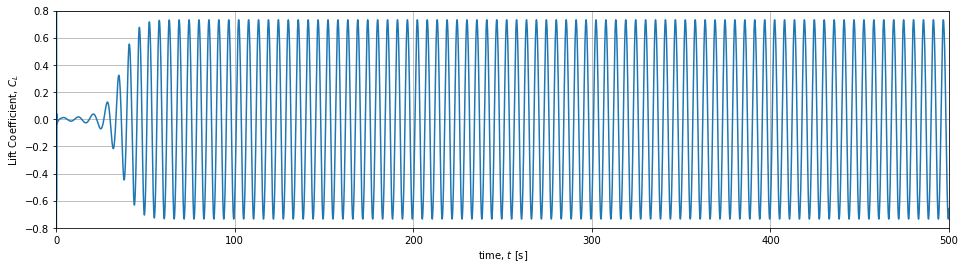

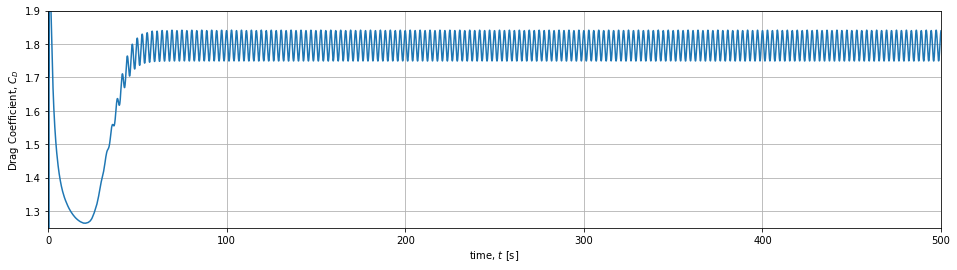

Lift coefficient of -0.0005834104248160982 +- 0.7336714455751838
Drag coefficient of 1.7952542897675 +- 0.0461526602325002
Lift coefficient RMS of 0.518944168501581
Drag coefficient RMS of 0.032277993578462595


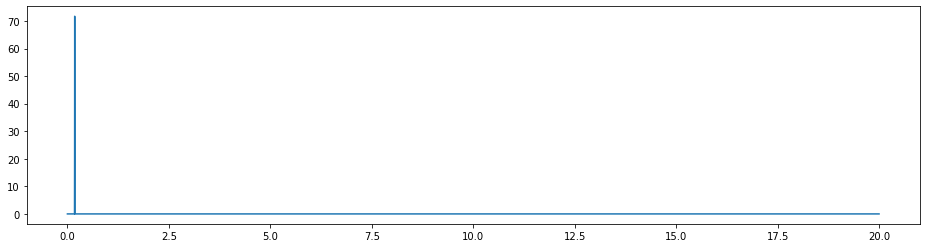

Vortex shedding freq: 0.17999999999995908 [Hz]
Strouhal Number: 0.17999999999995908


In [52]:
diamond_t = diamond_data[:,0]
diamond_cd = diamond_data[:,1]
diamond_cl = diamond_data[:,3]

L = 1
V = 1

plot_coefficients(diamond_t, diamond_cl, diamond_cd,
                 [0, 500], [-0.8, 0.8],
                 [0, 500], [1.25, 1.9],
                 spacer*100, spacer*100)
calc_strouhal(diamond_t[spacer*100:], diamond_cl[spacer*100:], L, V)